# STA 141B: Homework 2
Winter 2018

## Student Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Zhihao

Last Name: Meng

Student ID: 915537642

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax


## Part 1: Image Processing Basics

Computers use tiny dots called _pixels_ to display images. Each pixel is stored as an array of numbers that represent color intensities.

__Example.__ In an 8-bit grayscale image, each pixel is a single number. The number represents light intensity ranging from black (0) to white (255).

__Example.__ In a 24-bit RGB color image, each pixel is an array of 3 numbers. These numbers range from 0 to 255 and represent red, green, and blue intensity, respectively. For instance, `(0, 0, 255)` is <span style="color:#00F">bright blue</span> and `(255, 128, 0)` is <span style="color:#FF8000">orange</span>.

In this assignment, you'll use Python and NumPy to manipulate 24-bit RGB color images.

You can use `Image.open()` from the Python imaging library (PIL) to open an image:

In [1]:
from PIL import Image

# Cat image from https://unsplash.com/photos/FqkBXo2Nkq0
cat_img = Image.open("cat.png")

Images display inline in Jupyter notebooks:

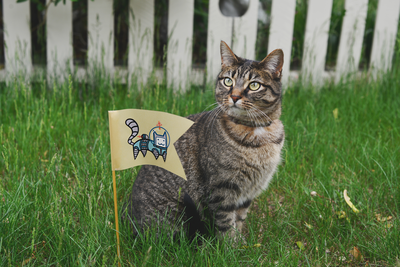

In [2]:
cat_img

In a Python terminal, you can display the image in a new window with `.show()` instead.

NumPy can convert images to arrays:

In [3]:
import numpy as np

cat = np.array(cat_img)

To convert an array back to an image (for display) use the function below:

In [4]:
def as_image(x):
    """Convert an ndarray to an Image.
    
    Args:
        x (ndarray): The array of pixels.
        
    Returns:
        Image: The Image object.
    """
    return Image.fromarray(np.uint8(x))

__Exercise 1.1.__ How many dimensions does the `cat` array have? What does each dimension represent?

In [28]:
from PIL import Image

In [29]:
cat_image=Image.open("/Users/HP/141b-hw2-Zhihao2018/cat.png")

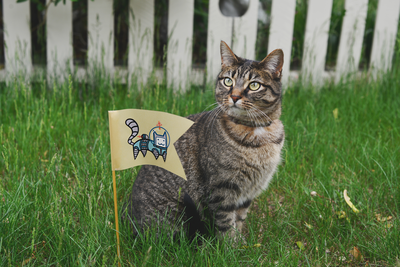

In [30]:
cat_image

In [31]:
import numpy as np
cat_array=np.array(cat_image)
cat_array.shape

(267, 400, 3)

In [32]:
n,p,q=cat_array.shape

The dimensions of the cat array are 267x400x3. 267 represents the height(width) of the picture. 400 represents the length of the picture. 3 represents the color(red, green blue)

__Exercise 1.2.__ Use `.copy()` to copy the cat array to a new variable. Swap the green and blue color channels in the copy. Display the result.

In [33]:
cat_copy=cat_array.copy()
print(cat_copy)
print(cat_copy.size)

[[[ 29  29  27]
  [ 36  38  40]
  [ 86  88  89]
  ..., 
  [200 200 198]
  [199 199 197]
  [194 194 194]]

 [[ 29  30  27]
  [ 34  38  39]
  [ 84  86  88]
  ..., 
  [200 200 198]
  [200 200 198]
  [193 193 192]]

 [[ 28  32  26]
  [ 33  38  38]
  [ 80  84  84]
  ..., 
  [200 200 198]
  [199 199 197]
  [191 192 191]]

 ..., 
 [[ 50  86  35]
  [ 78 119  80]
  [ 62  99  51]
  ..., 
  [103 118  66]
  [128 134  86]
  [138 144  95]]

 [[ 59  98  45]
  [ 53  97  43]
  [ 46  73  40]
  ..., 
  [106 120  64]
  [125 132  82]
  [133 137  87]]

 [[ 76 116  61]
  [ 46  92  29]
  [ 62  85  62]
  ..., 
  [101 115  61]
  [102 115  66]
  [113 127  73]]]
320400


In [34]:
def as_image(x):
    return Image.fromarray(np.uint8(x))

In [35]:
def as_image1(cat_copy):
    a=cat_copy.copy()[:,:,[2,1]] #The blue-green channel.
    cat_copy[:,:,[1,2]]=a #Exchange the green and blue channel.
    return as_image(cat_copy)

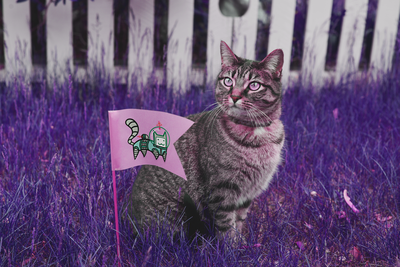

In [36]:
as_image1(cat_copy)

__Exercise 1.3.__ Why is `.copy()` necessary in exercise 1.2? What happens if you don't use `.copy()`?

Because if I do not use copy() and only use cat_copy=cat_array, when I swap the green and blue channel, the two channels in the original array cat_array will also exchange.

__Exercise 1.4.__ Flip the blue color channel from left to right. Display the resulting image. _Hint: see the NumPy documentation on array manipulation routines._

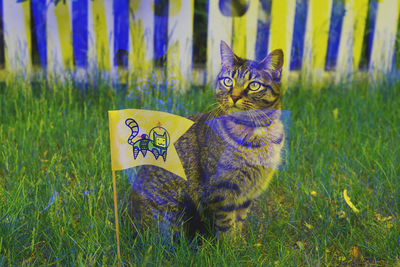

In [37]:
cat_copy1=cat_array.copy()
cat_copy1[:,:,2]=np.fliplr(cat_array[:,:,2])
as_image(cat_copy1)

## Part 2: Singular Value Decomposition

Suppose $X$ is an $n \times p$ matrix (for instance, one color channel of the cat image). The _singular value decomposition_ (SVD) factors $X$ as $X = UD V^T$, where:

* $U$ is an $n \times n$ orthogonal matrix
* $D$ is an $n \times p$ matrix with zeroes everywhere except the diagonal
* $V$ is an $p \times p$ orthogonal matrix

Note that a matrix $A$ is _orthogonal_ when $A^T A = I$ and $AA^T = I$.

__Example.__ We can use NumPy to compute the SVD for a matrix:

In [15]:
x = np.array(
    [[0, 2, 3],
     [3, 2, 1]]
)
u, d, vt = np.linalg.svd(x)
# Here d is 2x2 because NumPy only returns the diagonal of D.
print("u is:\n", u, "\nd is:\n", d, "\nv^T is:\n", vt)

u is:
 [[-0.68145174 -0.73186305]
 [-0.73186305  0.68145174]] 
d is:
 [ 4.52966162  2.54600974] 
v^T is:
 [[-0.48471372 -0.62402665 -0.6128975 ]
 [ 0.80296442 -0.03960025 -0.59470998]
 [ 0.34684399 -0.78039897  0.52026598]]


If we let

* $u_i$ denote the $i$th column of $U$
* $d_i$ denote the $i$th diagonal element of $D$
* $v_i$ denote the $i$th column of $V$

then we can write the SVD as $\ X = UDV^T = d_1 u_1 v_1^T + \ldots + d_m u_m v_m^T\ $ using the rules of matrix multiplication. In other words, the SVD decomposes $X$ into a sum!

If we eliminate some of the terms in the sum, we get a simple approximation for $X$. For instance, we could eliminate all but first 3 terms to get the approximation $X \approx d_1 u_1 v_1^T + d_2 u_2 v_2^T + d_3 u_3 v_3^T$. This is the same as if we:

* Zero all but the first 3 diagonal elements of $D$ to get $D_3$, then compute $X \approx UD_3V^T$
* Eliminate all but the first 3 columns of $V$ to get $p \times 3$ matrix $V_3$, then compute $X \approx UDV_3^T$

We always eliminate terms starting from the end rather than the beginning, because these terms contribute the least to $X$.

Why would we want to approximate a matrix $X$?

In statistics, _principal components analysis_ uses this approximation to reduce the dimension (number of covariates) in a  centered (mean 0) data set. The vectors $d_i u_i$ are called the _principal components_ of $X$. The vectors $v_i^T$ are called the _basis vectors_. Note that both depend on $X$. The dimension is reduced by using the first $q$ principal components instead of the original $p$ covariates. In other words, the $n \times p$ data $X$ is replaced by the $n \times q$ data $UD_q = XV_q$

In computing, this approximation is sometimes used to reduce the number of bits needed to store a matrix (or image). If $q$ terms are kept, then only $nq + pq$ values (for $XV_q$ and $V_q^T$) need to be stored instead of the uncompressed $np$ values.

__Exercise 2.1.__ Write the functions described below.

* A function that takes a matrix $X$ and returns its principal component matrix $XV_q$ and basis matrix $V_q^T$. This function should also take the number of terms kept $q$ as an argument.

* A function that takes a principal component matrix $XV_q$ and basis matrix $V_q^T$ and returns an approximation $\hat{X}$ for the original matrix.

As usual, make sure to document your functions. Test your function on the red color channel of the cat image. What's the smallest number of terms where the cat is still recognizable as a cat?

In [38]:
def svd1(x,q):
    u,d,vt=np.linalg.svd(x)
    vt=vt[:q,:]
    v=vt.T
    xv=x.dot(v)
    return xv,vt

In [39]:
def svd2(xv,vt):
    xhat=xv.dot(vt)
    return xhat

In [40]:
x=cat_array[:,:,1]
print(x)

[[ 29  38  88 ..., 200 199 194]
 [ 30  38  86 ..., 200 200 193]
 [ 32  38  84 ..., 200 199 192]
 ..., 
 [ 86 119  99 ..., 118 134 144]
 [ 98  97  73 ..., 120 132 137]
 [116  92  85 ..., 115 115 127]]


In [41]:
svd1(x,3)

(array([[ -2.67367396e+03,  -5.03796523e+02,  -3.67303572e+02],
        [ -2.68471253e+03,  -5.27460099e+02,  -3.65997103e+02],
        [ -2.71176492e+03,  -5.51483115e+02,  -3.66286478e+02],
        [ -2.73719364e+03,  -5.65104259e+02,  -3.61703043e+02],
        [ -2.74955099e+03,  -5.69058781e+02,  -3.50249184e+02],
        [ -2.75864824e+03,  -5.68076126e+02,  -3.40857001e+02],
        [ -2.76578579e+03,  -5.69737976e+02,  -3.31884562e+02],
        [ -2.77327916e+03,  -5.74031076e+02,  -3.25324036e+02],
        [ -2.78385085e+03,  -5.76858608e+02,  -3.23100238e+02],
        [ -2.79604559e+03,  -5.73000382e+02,  -3.21834602e+02],
        [ -2.81155456e+03,  -5.71087814e+02,  -3.15927458e+02],
        [ -2.83551639e+03,  -5.74644226e+02,  -3.11617427e+02],
        [ -2.85948611e+03,  -5.84889098e+02,  -3.10280090e+02],
        [ -2.87001094e+03,  -6.05449848e+02,  -3.07141746e+02],
        [ -2.87433429e+03,  -6.25510230e+02,  -3.04970194e+02],
        [ -2.88319886e+03,  -6.44116312e

In [42]:
xv,vt=svd1(x,3)
svd2(xv,vt)

array([[  65.22629687,   64.62653437,   77.79948147, ...,  156.58370213,
         141.657264  ,  128.98378785],
       [  63.39957753,   62.82409192,   76.41619616, ...,  157.04524207,
         142.04652342,  129.22405894],
       [  62.19728968,   61.63525328,   75.66673873, ...,  158.39076653,
         143.25297433,  130.23424966],
       ..., 
       [  97.32543142,   95.06908588,   90.34557397, ...,   93.72103763,
          89.44812632,   87.88470372],
       [  99.14349679,   96.78980521,   91.78052555, ...,   94.72949473,
          90.63326541,   89.24990674],
       [  95.99884807,   93.65255497,   88.70599819, ...,   91.72141365,
          87.98116984,   86.80639908]])

We can see that if we only take 3 terms from the red channel, the approximation is very poor.

If q=12, the picture is displayed below:

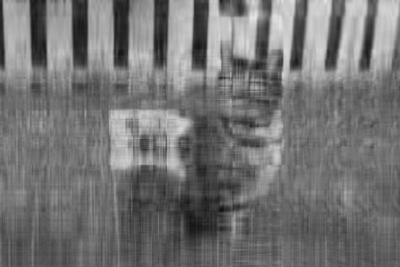

In [43]:
xv1,vt1=svd1(x,12)
x1=svd2(xv1,vt1)
as_image(x1)

The smallest number of terms where the cat can be recognized as a cat is 12.

__Exercise 2.2.__ You can check the number of bytes used by a NumPy array with the `.nbytes` attribute. How many bytes does the red color channel of the cat image use? How many bytes does the compressed version use when 10 terms are kept? What percentage of the original size is this?

In [44]:
b1=np.float64(x).nbytes
b1

854400

The red color channel of the cat image uses 854400 bytes.

In [45]:
xv2,vt2=svd1(x,10)
b2=np.float64(xv2).nbytes+np.float64(vt2).nbytes
b2

53360

53360 bytes are used when we kept 10 terms of the original image.

In [46]:
b2/b1

0.062453183520599254

This is 6.25% of the original size.

## Part 3: Fast Fourier Transform

The 2-dimensional _fast Fourier transform_ (FFT) is another way to decompose a matrix $X$ as a sum. The math behind the FFT is interesting but fairly advanced.

__Example.__ We can use NumPy to compute the FFT for a real-valued matrix:

In [19]:
x = np.array(
    [[0, 2, 3],
     [3, 2, 1]]
)
x_coef = np.fft.rfft2(x)
print(x_coef)

[[ 11.+0.j          -1.+0.j        ]
 [ -1.+0.j          -4.+1.73205081j]]


The return value is a matrix of complex coefficients. We can also use NumPy to invert the FFT:

In [15]:
# The second argument tells NumPy the dimensions of the original X.
np.fft.irfft2(x_coef, x.shape)

array([[ 0.,  2.,  3.],
       [ 3.,  2.,  1.]])

The FFT coefficients serve a role similar to the $d_i$ terms in the SVD. Terms in the FFT sum (which wasn't displayed) can be eliminated by setting coefficients to zero. This means we can also use the FFT for dimension reduction or file compression! For the FFT, we always eliminate terms starting from the bottom right corner of the coefficient matrix, because the terms for these coefficients contribue the least to $X$. As before, we use $q$ to denote the number of terms kept.

For file compression, the FFT differs from the SVD in an important way: we don't need to store the basis matrix. This is because the FFT always uses the same basis matrix regardless of $X$.

__Example.__ To compress the matrix in the previous example, we could eliminate one term:

In [16]:
# Zero the coefficient in the bottom right corner.
x_coef[1:, 1:] = 0
print("x_coef is:\n", x_coef, "\nx approx is:\n", np.fft.irfft2(x_coef, x.shape))

x_coef is:
 [[ 11.+0.j  -1.+0.j]
 [ -1.+0.j   0.+0.j]] 
x approx is:
 [[ 1.33333333  1.83333333  1.83333333]
 [ 1.66666667  2.16666667  2.16666667]]


As you can see, for a matrix this small eliminating even one term gives a poor approximation.

__Exercise 3.1.__ Write the functions described below.

* A function that returns the FFT coefficients and dimensions of a matrix $X$. This function should also accept an argument for where to start zeroing-out in the bottom right corner of the coefficient matrix.
* A function that takes FFT coefficients and dimensions and returns an approximation $\hat{X}$ for the original matrix.

Make sure to document your functions. Test your function on the red color channel of the cat image. What's the smallest number of terms where the cat is still recognizable as a cat?

In [62]:
def fft1(x,q):
    x_coef=np.fft.rfft2(x)
    x_coef[q:,q:]=0
    xd=x.shape
    return x_coef,xd

In [54]:
def fft2(x_coef,xd):
    xhat=np.fft.irfft2(x_coef,xd)
    return xhat

In [67]:
fft1(x,3)

(array([[  1.23303760e+07 +0.00000000e+00j,
           2.05632106e+05 +1.95238463e+05j,
          -2.50420985e+05 +1.11294638e+05j, ...,
          -2.54250402e+03 -2.60561159e+03j,
          -2.29674405e+03 -8.02869798e+01j,
          -2.67400000e+03 +0.00000000e+00j],
        [ -6.21376641e+04 -9.17681302e+05j,
           1.48798594e+05 +5.71152722e+05j,
           2.85208337e+05 -3.76203706e+05j, ...,
          -2.70379116e+02 +1.06876343e+03j,
          -3.57565815e+03 -2.49424286e+02j,
          -2.01527206e+03 +1.81167535e+03j],
        [  1.32365376e+05 -7.62244234e+05j,
           1.68351263e+04 -1.73468548e+04j,
          -6.06615872e+04 +6.39650244e+04j, ...,
          -3.23109907e+02 +1.36334564e+03j,
          -1.67888662e+02 +1.67349600e+03j,
          -1.80432011e+03 +7.32453561e+02j],
        ..., 
        [ -1.13044904e+05 +1.23032208e+05j,
          -1.27459555e+05 +1.63365550e+05j,
           9.19928260e+04 +5.29314077e+04j, ...,
           0.00000000e+00 +0.00000000e+

In [58]:
x_coef1=np.fft.rfft2(x)
x_coef1.shape

(267, 201)

In [66]:
x.shape

(267, 400)

In [50]:
x_coef,xd=fft1(x,3)
fft2(x_coef,xd)

array([[ 117.63718598,   89.3099041 ,   82.79471148, ...,  164.23395535,
         151.01104196,  159.85630642],
       [ 117.04870816,   89.49040424,   83.35498764, ...,  164.91906868,
         151.72596329,  160.06259359],
       [ 119.0734169 ,   92.37634621,   86.68513259, ...,  167.98712616,
         154.89885854,  162.77716161],
       ..., 
       [  74.09059444,   44.81091848,   38.346709  , ...,  113.19335676,
         101.09200847,  112.52841131],
       [  74.05045651,   45.41069972,   39.2825498 , ...,  114.63304179,
         102.49517499,  113.43392343],
       [  70.29113747,   42.36108348,   36.60807651, ...,  112.19972145,
         100.07815124,  110.5439399 ]])

We can see that if we only eliminate 3 terms from the red channel, the approximation is good.

If q=17, the picture is displayed below:

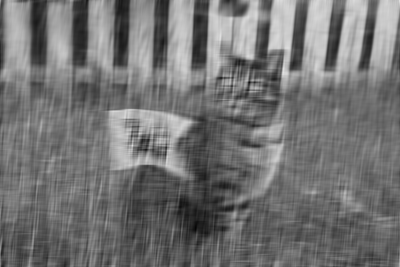

In [51]:
x_coef1,xd1=fft1(x,17)
x3=fft2(x_coef1,xd1)
as_image(x3)

In [52]:
x_coef.shape

(267, 201)

The smallest number of terms where the cat can be recognized as a cat is 17.

__Exercise 3.2.__ For both decompositions (SVD and FFT), examine the number of bytes and image clarity at several values of $q$. Which decomposition would you expect to work better for dimension reduction? Which decomposition would you expect to work better for file compression? Think about this carefully and explain your reasoning.

In [55]:
def by(x,q):
    xv,vt=svd1(x,q)
    by1=np.complex128(xv).nbytes+np.complex128(vt).nbytes
    x_copy=x.copy()
    x_coef,xd=fft1(x_copy,q)
    by2=np.complex128(x_coef).nbytes-np.complex128(x_coef[q:,q:]).nbytes+np.complex128(xd).nbytes
    return print("If q=",q,"SVD will use",by1,"bytes, FFT will use",by2,"bytes.")

In [56]:
def SVD(x,q):
    xv1,vt1=svd1(x,q)
    x2=svd2(xv1,vt1)
    return as_image(x2)

In [57]:
def FFT(x,q):
    x_coef1,xd1=fft1(x,q)
    x3=fft2(x_coef1,xd1)
    return as_image(x3)

If q=20,

In [58]:
by(x,20)

If q= 20 SVD will use 213440 bytes, FFT will use 143392 bytes.


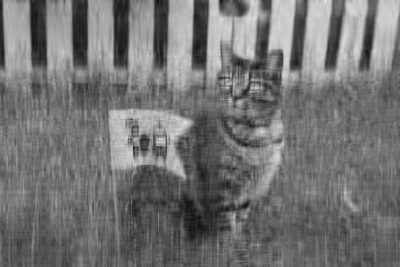

In [59]:
SVD(x,20)

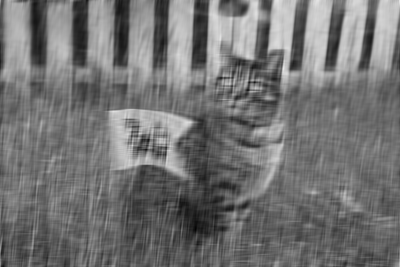

In [60]:
FFT(x,20)

if q=30,

In [61]:
by(x,30)

If q= 30 SVD will use 320160 bytes, FFT will use 210272 bytes.


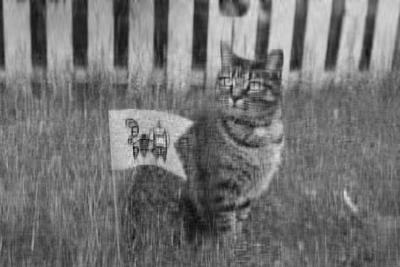

In [62]:
SVD(x,30)

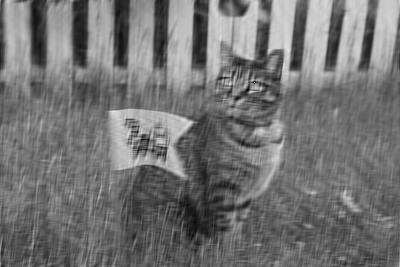

In [63]:
FFT(x,30)

if q=100,

In [64]:
by(x,100)

If q= 100 SVD will use 1067200 bytes, FFT will use 588832 bytes.


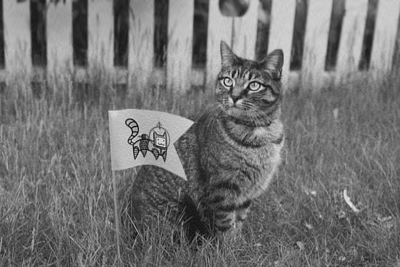

In [65]:
SVD(x,100)

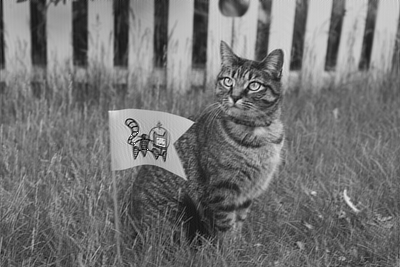

In [107]:
FFT(x,100)

For every q, we find that the SVD can get a clearer image but FFT needs fewer bytes to save the useful data. If the clarity of picture (for example,where the cat can only be recognized as a cat),SVD needs a smaller q.
Therefore, SVD works better for dimension reduction, FFT works better for file compression.